In [96]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
# Set-up DataFrame for NLP
#suicide = pd.read_csv('../data/suicide_clean.csv')
#depression = pd.read_csv('../data/depression_clean.csv')
subreddits = pd.read_csv('../data/subreddits_clean.csv')

In [37]:
#Set-up X- and y-variables
# NOTE: cvec needs a vector(Series), not a matrix(DataFrame)
X = subreddits['submission_text']
y = subreddits['subreddit']

In [38]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=86)
# Split the data into the training and testing sets.
#X2_train, X2_test, y2_train, y2_test = train_test_split(X,
                                                    #y,
                                                    #stratify=y,
                                                    #random_state=86)

In [124]:
a = list(np.sort(np.random.choice(list(subreddits.index), size=1000)))
subreddits_a = subreddits.loc[a,['submission_text','subreddit']]

Xa = subreddits_a['submission_text']
ya = subreddits_a['subreddit']

# Split the data into the training and testing sets.
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,
                                                    ya,
                                                    stratify=ya,
                                                    random_state=86)

## Model Preparation

##### Establish a baseline accuracy (predicting the plurality class)

In [39]:
# The Null Model is about 50/50
y_test.value_counts(normalize=True)

1    0.50735
0    0.49265
Name: subreddit, dtype: float64

In [40]:
# Instantiate a CountVectorizer with the default hyperparameters
cvec = CountVectorizer(max_features=10000, ngram_range=(1,2), binary=True, max_df=1.0, min_df=2)
#cvec2 = CountVectorizer(max_features=9000, ngram_range=(1,2), binary=True, max_df=0.375, min_df=3,stop_words='english')

#stop_words=[]
# Look at sklearn's stopwords.
# print(CountVectorizer(stop_words = 'english').get_stop_words())

In [41]:
# Fit the vectorizer on our corpus
cvec.fit(X_train)
#cvec2.fit(X2_train)

CountVectorizer(binary=True, max_features=10000, min_df=2, ngram_range=(1, 2))

In [42]:
# Transform the train corpus
X_train = cvec.transform(X_train)
#X2_train = cvec2.transform(X2_train)

In [43]:
# Transform test corpus
X_test = cvec.transform(X_test)
#X2_test = cvec2.transform(X2_test)

In [13]:
# Training scores
X_train_score = cvec.score(X_train, y_train)
#X2_train_score = cvec2.score(X2_train, y2_train)

print(f'Training Scores:\n\tX = {round(X_train_score*100,3)}%')#\n\tX2  = {round(X2_train_score*100,3)}%')

AttributeError: 'CountVectorizer' object has no attribute 'score'

In [ ]:
# Test scores
cvec_test_score = pipe_cvec.score(X_test, y_test)
#tvec_test_score = pipe_tvec.score(X_test, y_test)

print(f'Test Scores:\n\tCount-V = {round(cvec_test_score*100,3)}%')#\n\tTF-IDF  = {round(tvec_test_score*100,3)}%')

##### STOP WORDS

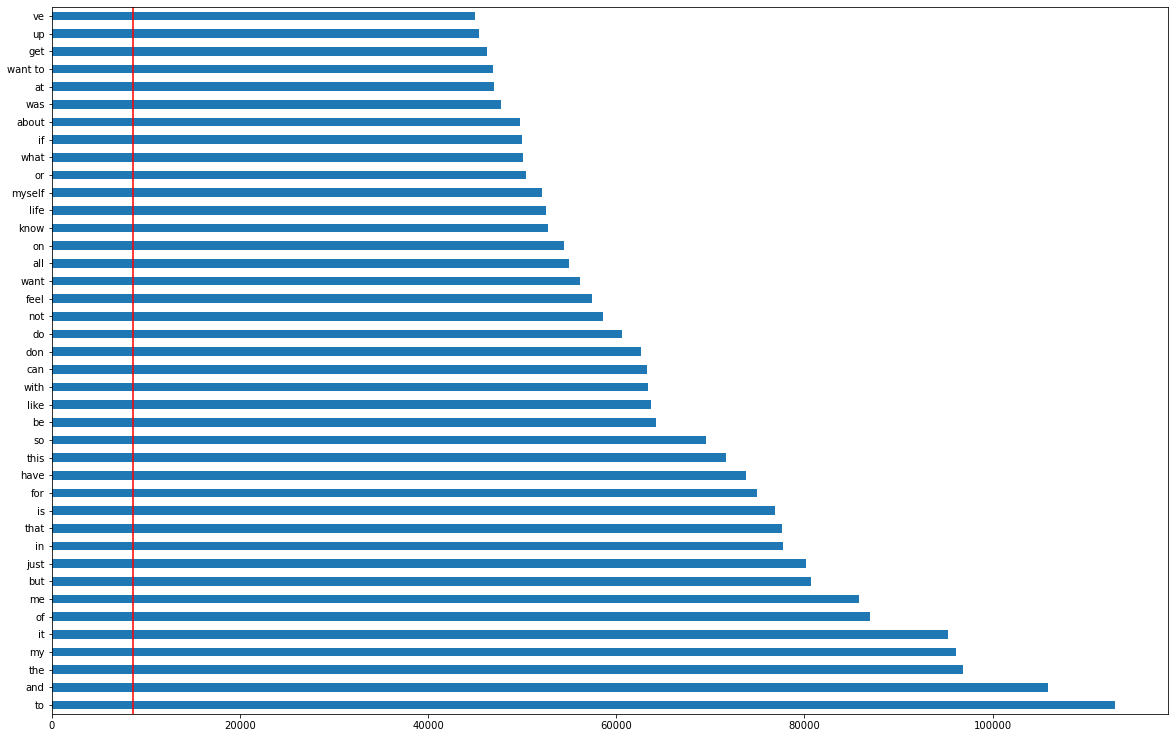

In [44]:
# convert training data to dataframe
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(40).plot(kind='barh',figsize=(20,13));
plt.axvline(x=X_train_df.sum().sort_values().quantile(q=0.964),c='r');
# Let's look at sklearn's stopwords.
#print(CountVectorizer(stop_words = 'english').get_stop_words())

### Fig. 01  
***Notice the 97th quantile (red line) is right on the boundary of introducing 'want to', the 2-gram with the highest document frequency. I like this to be my first guess for a cut-off max_df because n-grams are one of the few ways that this model will account for the contextual meaning typically present in language. There are uninteresting tokens, both more and less frequent, but tokens more frequently occurring in the data will be designated as Stop-Words for initial model tuning.***

In [45]:
# Verify No. of columns are max_features
print(X_train.shape)

(125100, 10000)


In [46]:
# Notice the 97th quantile is right on the boundary of introducing the most frequent 2-gram.
print(X_train_df.sum().sort_values().quantile(q=0.964))
X_train_df.sum().sort_values()[962:965]

8621.556000000004


individual     378
improvement    378
former         378
dtype: int64

In [47]:
# % of documents in X_train with 2-gram 'want to' 
round(X_train_df.sum().sort_values()[963:964]/X_train.shape[0],3)

improvement    0.003
dtype: float64

In [48]:
# Inspect tokens in corpus
cvec.get_feature_names()[800:900];

In [49]:
len(cvec.vocabulary_)

10000

In [ ]:
cvec.stop_words_;

In [ ]:
cvec.vocabulary_;

In [ ]:
cvec.get_feature_names();

In [50]:
stops = list(CountVectorizer(stop_words = 'english').get_stop_words())
len(stops)

318

In [52]:
tops = X_train_df.sum().sort_values(ascending=False)[:10000].index.tolist()
len(tops)

10000

In [83]:
sub = pd.DataFrame(y_train)
X_train_df['subreddit'] = y_train

C:\Users\bgrif\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:382: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.values = np.delete(self.values, loc, 0)
C:\Users\bgrif\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:383: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.mgr_locs = self.mgr_locs.delete(loc)


In [91]:
X_train_df['subreddit'].value_counts()

0    123890
1      1210
Name: subreddit, dtype: int64

In [53]:
text_and_subredditwords = []
maybes =[]
for word in tops:
    if word in stops:
        my_stop_words.append(word)
    else:
        maybes.append(word)
len(my_stop_words)
#print(maybes)

255

In [72]:
my_stop_words[120:140]

['may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'neither',
 'never',
 'next',
 'no',
 'nobody',
 'none']

In [ ]:
my_stop_words.remove(['after',
                      'afterwards',
                      'again',
                      'against',
                      'alone',
                      'another',
                      'anyone',
                      'anything',
                      'anywhere',
                      'below',
                      'beyond',
                      'bottom',
                      'call',
                      'cannot',
                      'cant',
                      'couldnt',
                      'cry',
                      'done',
                      'down',
                      'else',
                      'empty',
                      'enough',
                      'everyone',
                      'everything',
                      'everywhere',
                      'fire',
                      'further',
                      'give',
                      'herself',
                      'keep',
                      'last',
                      'least',
                      'less',
                      'may',
 'me',
 'most',
 'mostly',
 'move',
 'must',
 'myself',
 'never',
 'no',
 'nobody',
 'none'


In [56]:
print(len(my_stop_words))

255


In [5]:
%store -r my_stop_words
len(my_stop_words)

7

In [30]:

for word in ['just', 'like', 'don','ve', 'things', 'in my', 'of my']:
    my_stop_words.append(word)
%store my_stop_words

Stored 'my_stop_words' (list)


In [31]:
print(my_stop_words)

['just', 'like', 'don', 've', 'things', 'in my', 'of my']


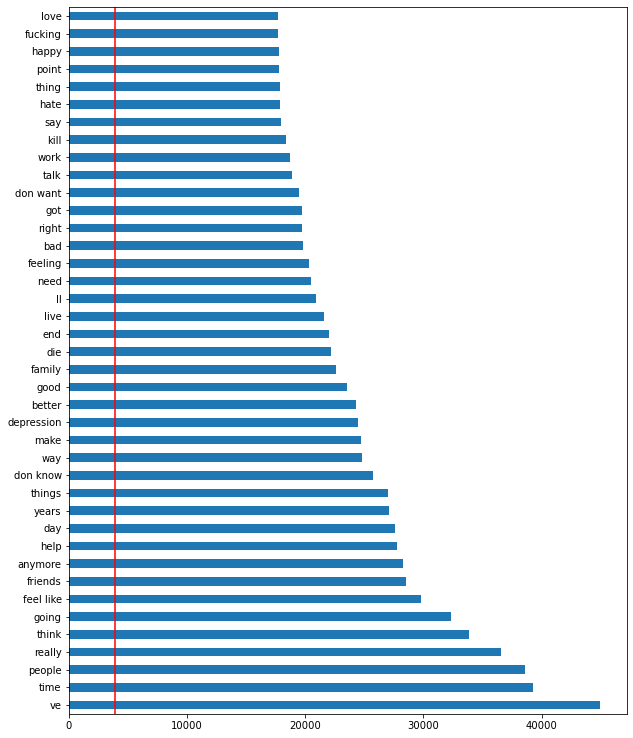

In [32]:
# STOP WORDS

# Convert training data to dataframe
X2_train_df = pd.DataFrame(X2_train.todense(), 
                          columns=cvec2.get_feature_names())

# plot top occuring words
X2_train_df.sum().sort_values(ascending=False).head(40).plot(kind='barh',figsize=(10,13));
plt.axvline(x=X2_train_df.sum().sort_values().quantile(q=0.964),c='r');
# Let's look at sklearn's stopwords.
#print(CountVectorizer(stop_words = 'english').get_stop_words())

In [33]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=86)

In [34]:
# Pipeline Set-Up:
# Stage 1. CountVectorizer (transformer)
# Stage 2. Multinomial Naive Bayes (estimator)
pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
# Estimate performance of models on unseen data
cvec_cv_score = cross_val_score(pipe_cvec, X_train, y_train, cv=3).mean() 
tvec_cv_score = cross_val_score(pipe_tvec, X_train, y_train, cv=3).mean() 

print(f'Cross-Val Scores:\n\tCount-V = {round(cvec_cv_score*100,3)}%\n\tTF-IDF  = {round(tvec_cv_score*100,3)}%')

In [ ]:
# Fit the models with default parameters
pipe_cvec.fit(X_train, y_train)
pipe_tvec.fit(X_train, y_train)

In [ ]:
# Training scores
cvec_train_score = pipe_cvec.score(X_train, y_train)
tvec_train_score = pipe_tvec.score(X_train, y_train)

print(f'Training Scores:\n\tCount-V = {round(cvec_train_score*100,3)}%\n\tTF-IDF  = {round(tvec_train_score*100,3)}%')

In [ ]:
# Test scores
cvec_test_score = pipe_cvec.score(X_test, y_test)
tvec_test_score = pipe_tvec.score(X_test, y_test)

print(f'Test Scores:\n\tCount-V = {round(cvec_test_score*100,3)}%\n\tTF-IDF  = {round(tvec_test_score*100,3)}%')